In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

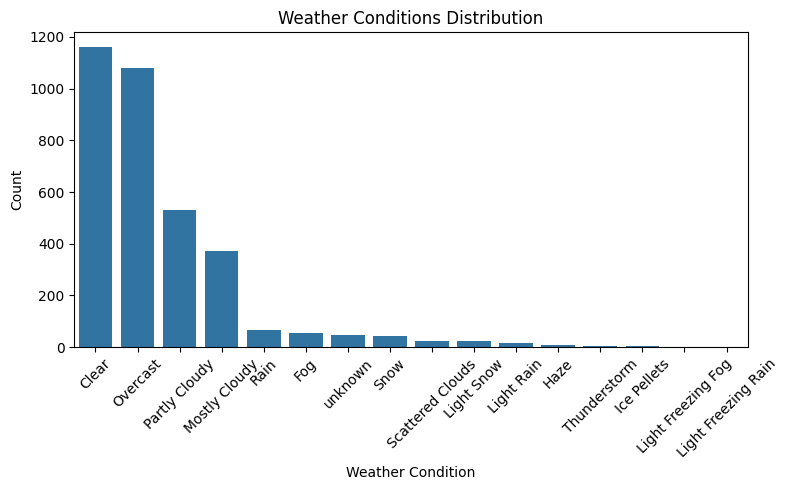

In [41]:
file_path = '../data/modified_data/Cleaned Dataset.csv'  
data = pd.read_csv(file_path)

data['dec.temperature'] = pd.to_numeric(data['dec.temperature'], errors='coerce')

weather_counts = data['dec.weather.condition'].value_counts()

temperature_distribution = data['dec.temperature'].dropna()
temperature_filtered = temperature_distribution[temperature_distribution > -50]


steps_distribution = data['jbsteps60'].dropna()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Weather Conditions Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

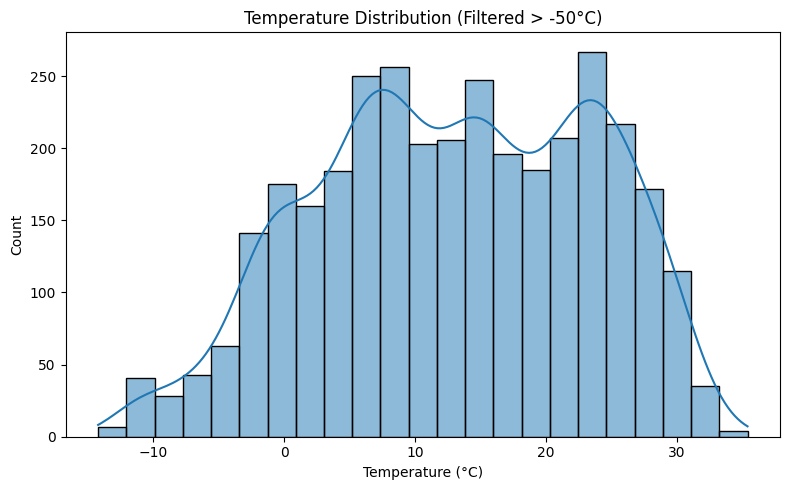

In [42]:
# Temperature distribution plot after filtering
plt.figure(figsize=(8, 5))
sns.histplot(temperature_filtered, kde=True)
plt.title('Temperature Distribution (Filtered > -50°C)')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

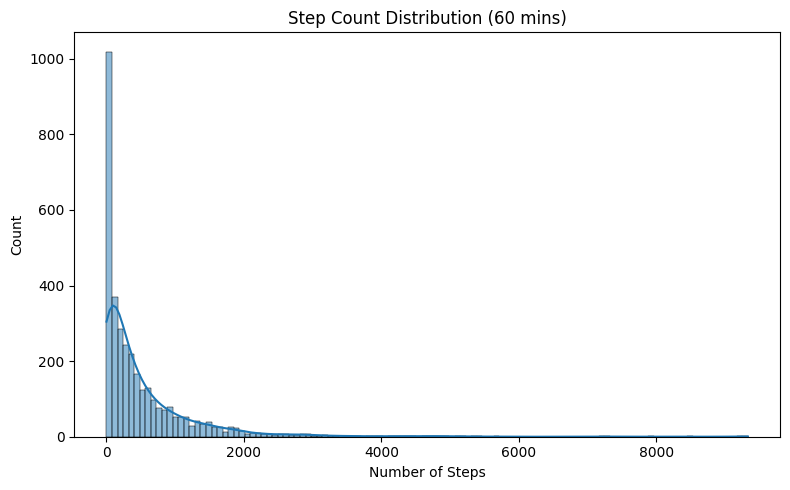

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(steps_distribution, kde=True)
plt.title('Step Count Distribution (60 mins)')
plt.xlabel('Number of Steps')
plt.tight_layout()
plt.show()

In [44]:
ranked_steps = data[['user.index', 'jbsteps60', 'jbmins60', 'sugg.decision.utime', 'dec.weather.condition', 'dec.temperature']].sort_values(by='jbsteps60', ascending=False)

ranked_steps.head(20)

,user.index,jbsteps60,jbmins60,sugg.decision.utime,dec.weather.condition,dec.temperature
2731,30,9330.0,58.0,2015-12-16 16:31:46,Overcast,5.4
2777,30,9209.0,60.0,2016-01-06 19:31:50,Clear,2.2
2781,30,9201.0,58.0,2016-01-09 16:33:25,Scattered Clouds,8.4
2742,30,8483.0,53.0,2015-12-20 19:31:51,Clear,5.8
2203,23,7896.0,54.0,2015-11-06 22:03:49,Overcast,11.0
2709,30,7291.0,44.0,2015-12-04 21:32:52,Clear,8.3
2634,28,7204.0,53.0,2015-11-17 23:01:01,Mostly Cloudy,14.2
1462,16,5696.0,43.0,2015-10-07 11:01:41,Mostly Cloudy,11.6
2004,21,5397.0,51.0,2015-12-03 19:33:51,Mostly Cloudy,5.9
1436,16,5359.0,51.0,2015-09-27 16:01:33,Overcast,25.6


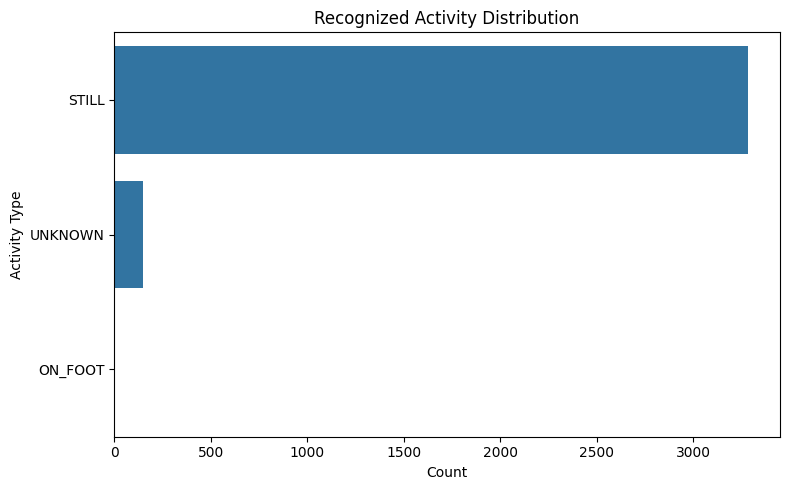

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['recognized.activity'])
plt.title('Recognized Activity Distribution')
plt.xlabel('Count')
plt.ylabel('Activity Type')
plt.tight_layout()
plt.show()

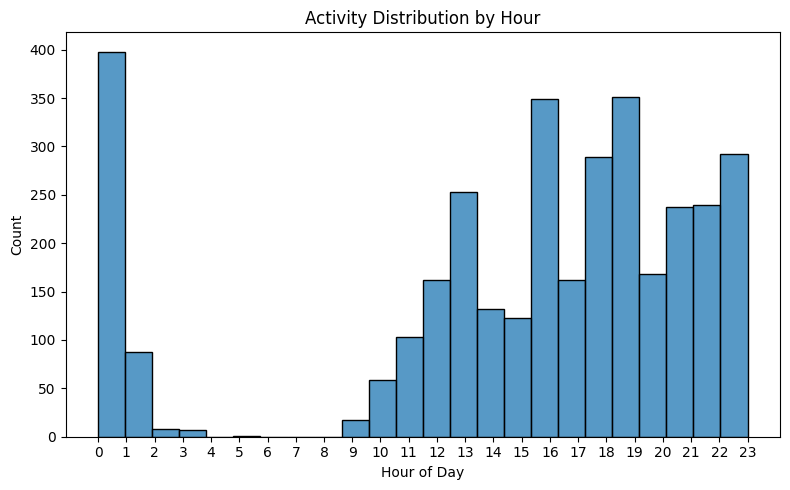

In [46]:
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S', errors='coerce')

data['hour'] = data['Time of Day'].dt.hour

plt.figure(figsize=(8, 5))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Activity Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()


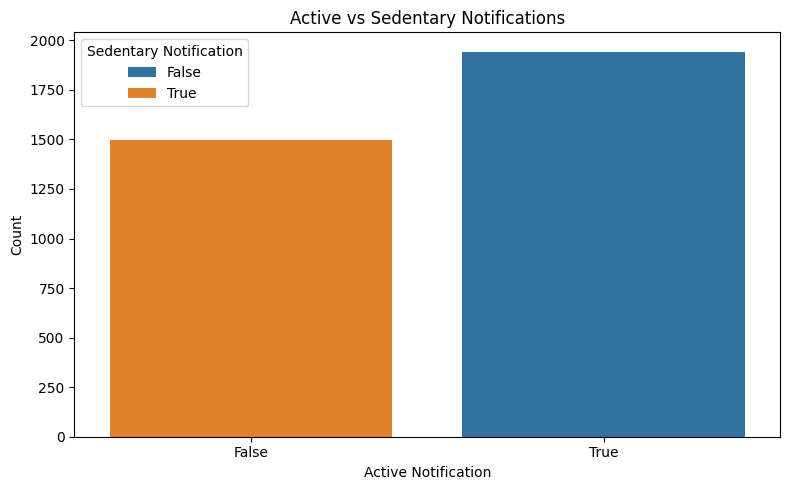

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='send.active', hue='send.sedentary')
plt.title('Active vs Sedentary Notifications')
plt.xlabel('Active Notification')
plt.ylabel('Count')
plt.legend(title='Sedentary Notification')
plt.tight_layout()
plt.show()

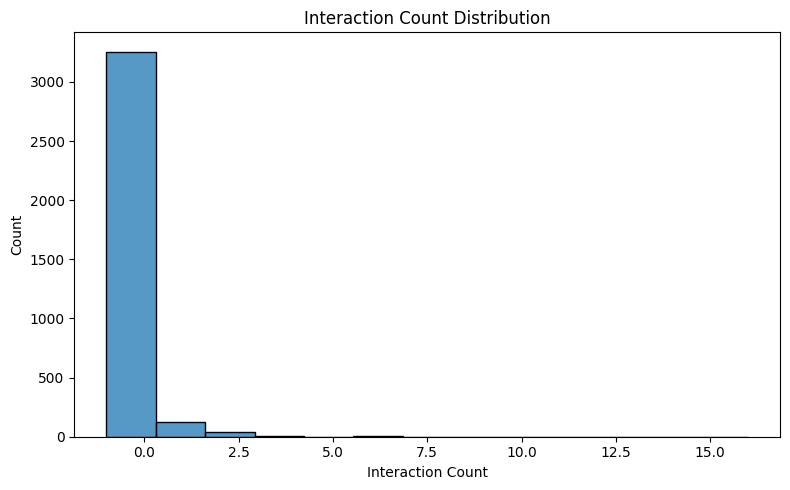

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(data['interaction.count'].dropna(), kde=False)
plt.title('Interaction Count Distribution')
plt.xlabel('Interaction Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


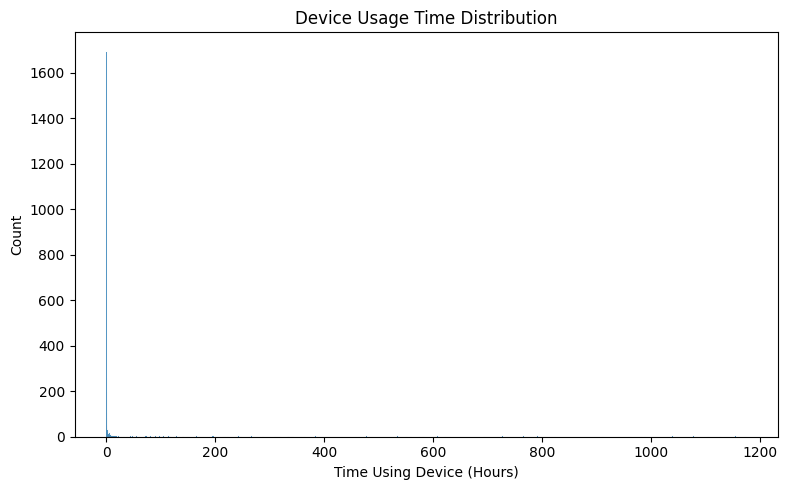

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(data['sugg.device.since'].dropna(), kde=False)
plt.title('Device Usage Time Distribution')
plt.xlabel('Time Using Device (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

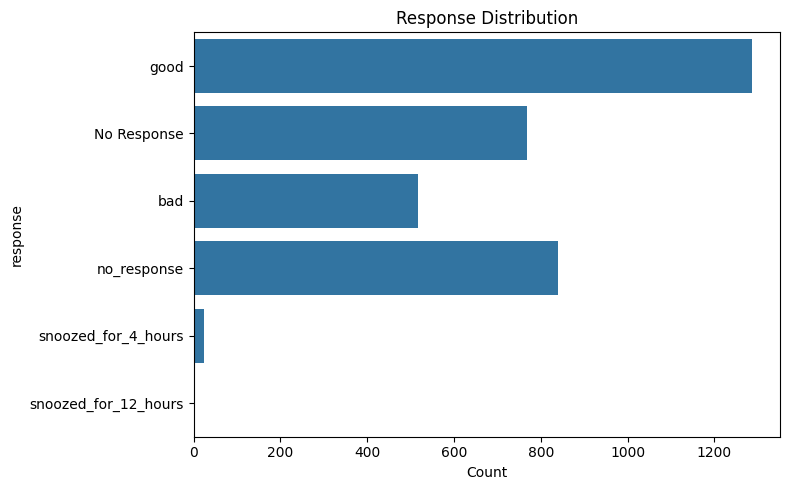

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['response'])
plt.title('Response Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

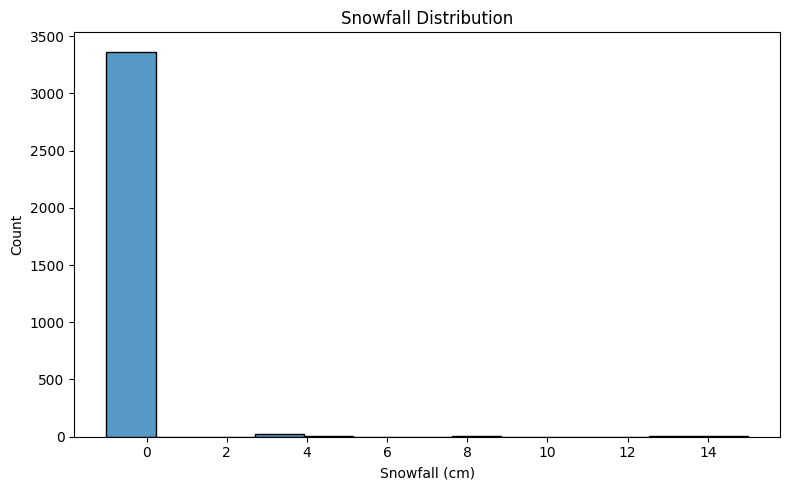

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(data['dec.snow'].dropna(), kde=False)
plt.title('Snowfall Distribution')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

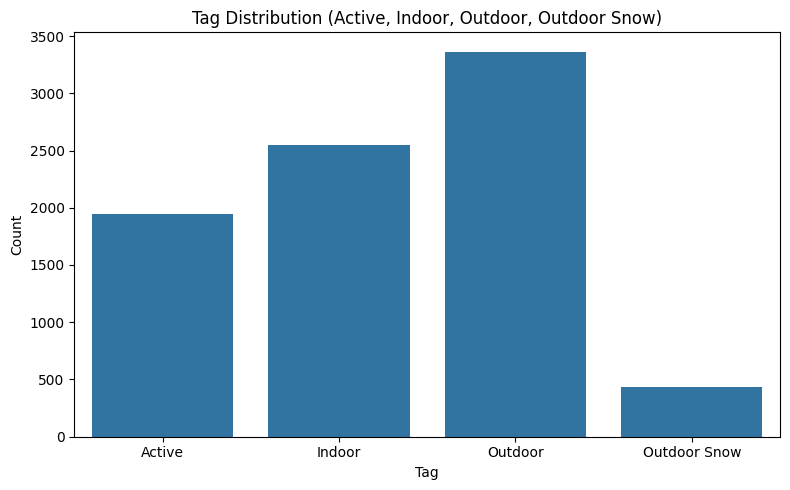

In [52]:
tag_data = pd.DataFrame({
    'Tag': ['Active', 'Indoor', 'Outdoor', 'Outdoor Snow'],
    'Count': [
        data['tag.active'].sum(),
        data['tag.indoor'].sum(),
        data['tag.outdoor'].sum(),
        data['tag.outdoor_snow'].sum()
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Tag', y='Count', data=tag_data)
plt.title('Tag Distribution (Active, Indoor, Outdoor, Outdoor Snow)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

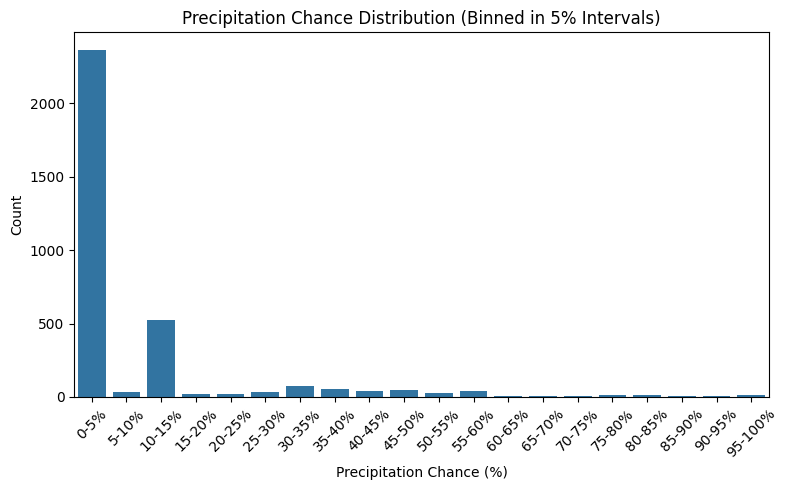

In [53]:
data['dec.precipitation.chance'] = pd.to_numeric(data['dec.precipitation.chance'], errors='coerce')

bins = range(0, 105, 5)  
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
data['precipitation_binned'] = pd.cut(data['dec.precipitation.chance'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='precipitation_binned', data=data)
plt.title('Precipitation Chance Distribution (Binned in 5% Intervals)')
plt.xlabel('Precipitation Chance (%)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

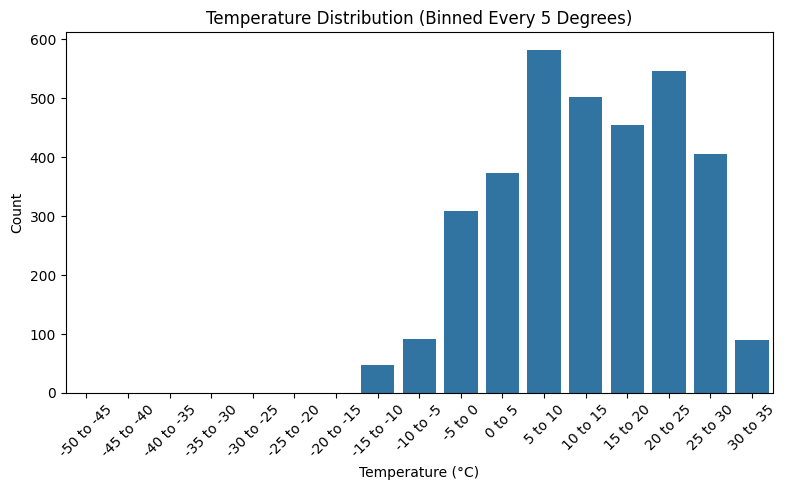

In [54]:
bins = range(-50, 40, 5)  
labels = [f'{i} to {i+5}' for i in range(-50, 35, 5)]

data['temperature_binned'] = pd.cut(data['dec.temperature'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='temperature_binned', data=data)
plt.title('Temperature Distribution (Binned Every 5 Degrees)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
avg_steps_sent60 = data['jbsteps60'].mean()
avg_steps_sent60

np.float64(519.1311809191391)

In [56]:
avg_steps_sent30 = data['jbsteps30'].mean()
avg_steps_sent30

np.float64(247.6844095404305)

In [57]:
avg_steps_unsent120 = data['jbsteps120'].mean()
avg_steps_unsent120

np.float64(1058.498254799302)

In [58]:
num_rows_sent = data.shape[0]
num_rows_sent

3438

In [59]:
filtered_df = data[data['user.index'] != 30]

# Calculate the average of jbsteps30 for the filtered data
avg_steps_sent30 = filtered_df['jbsteps30'].mean()
avg_steps_sent60 = filtered_df['jbsteps60'].mean()
avg_steps_sent120 = filtered_df['jbsteps120'].mean()


In [60]:
avg_steps_sent30

np.float64(239.47464200477327)

In [61]:
avg_steps_sent60


np.float64(498.9090095465394)

In [62]:
avg_steps_sent120

np.float64(1020.4570405727924)

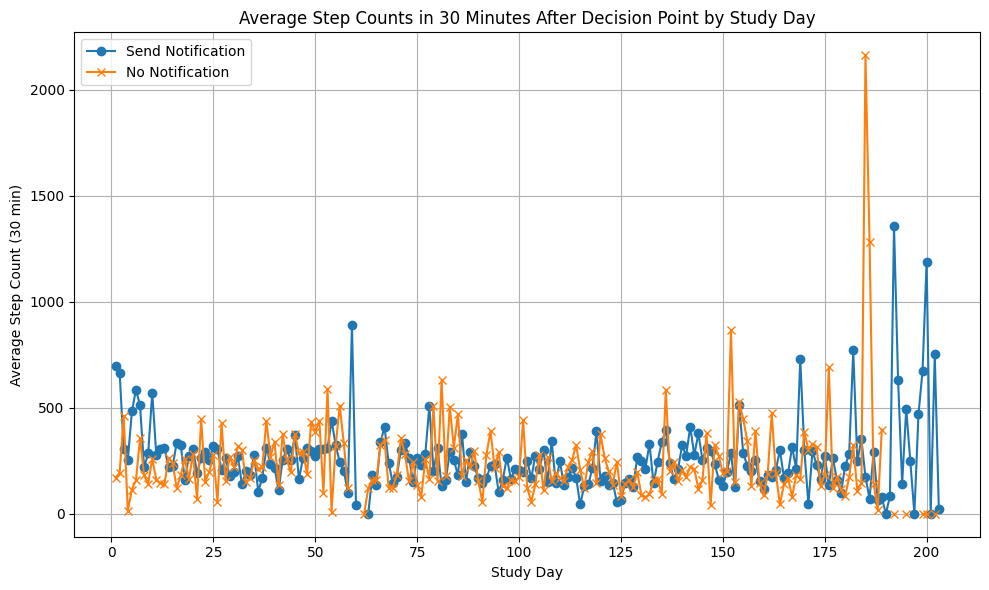

   study_day  jbsteps30_send  jbsteps30_no_send
0          1      698.000000         170.500000
1          2      665.000000         193.000000
2          3      305.000000         460.800000
3          4      253.428571          14.500000
4          5      482.500000         114.545455


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_send = '../data/modified_data/Cleaned Dataset.csv'  
file_path_no_send = '../data/modified_data/Cleaned Unsent Dataset.csv'  

send_data = pd.read_csv(file_path_send)
no_send_data = pd.read_csv(file_path_no_send)

# Convert 'sugg.decision.utime' to datetime format
send_data['sugg.decision.utime'] = pd.to_datetime(send_data['sugg.decision.utime'])
no_send_data['sugg.decision.utime'] = pd.to_datetime(no_send_data['sugg.decision.utime'])

# Extract the study day from 'sugg.decision.utime'
send_data['study_day'] = (send_data['sugg.decision.utime'] - send_data['sugg.decision.utime'].min()).dt.days + 1
no_send_data['study_day'] = (no_send_data['sugg.decision.utime'] - no_send_data['sugg.decision.utime'].min()).dt.days + 1

# Group the data by study day and calculate the average step counts for jbsteps30
send_avg_steps = send_data.groupby('study_day')['jbsteps30'].mean().reset_index()
no_send_avg_steps = no_send_data.groupby('study_day')['jbsteps30'].mean().reset_index()

# Merge the data into a single DataFrame for comparison
comparison_df = pd.merge(send_avg_steps, no_send_avg_steps, on='study_day', how='outer', suffixes=('_send', '_no_send'))

# Create a plot to compare average step counts over the study days
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['study_day'], comparison_df['jbsteps30_send'], label='Send Notification', marker='o')
plt.plot(comparison_df['study_day'], comparison_df['jbsteps30_no_send'], label='No Notification', marker='x')
plt.title('Average Step Counts in 30 Minutes After Decision Point by Study Day')
plt.xlabel('Study Day')
plt.ylabel('Average Step Count (30 min)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the comparison table
print(comparison_df.head())


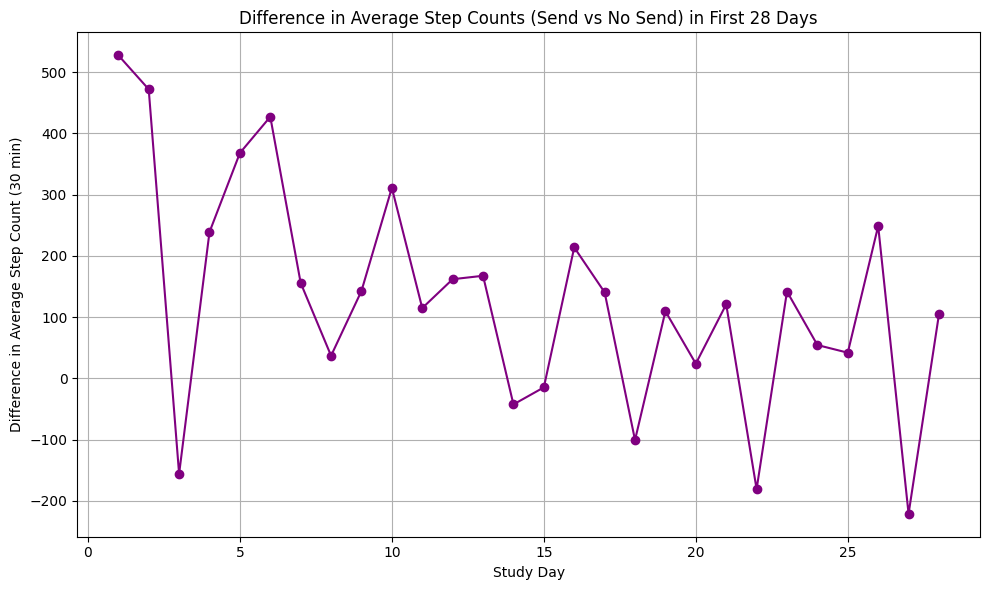

    study_day  jbsteps30_send  jbsteps30_no_send        diff
0           1      698.000000         170.500000  527.500000
1           2      665.000000         193.000000  472.000000
2           3      305.000000         460.800000 -155.800000
3           4      253.428571          14.500000  238.928571
4           5      482.500000         114.545455  367.954545
5           6      584.500000         157.375000  427.125000
6           7      511.666667         355.800000  155.866667
7           8      218.458333         181.421053   37.037281
8           9      284.625000         141.833333  142.791667
9          10      571.000000         259.875000  311.125000
10         11      275.913043         161.071429  114.841615
11         12      306.478261         144.529412  161.948849
12         13      308.222222         140.666667  167.555556
13         14      220.758621         263.187500  -42.428879
14         15      224.391304         239.000000  -14.608696
15         16      334.4

In [64]:
# Filter data to focus only on the first 28 days
first_28_days_send = send_data[send_data['study_day'] <= 28]
first_28_days_no_send = no_send_data[no_send_data['study_day'] <= 28]

# Group the data by study day and calculate the average step counts for jbsteps30
send_avg_steps_28 = first_28_days_send.groupby('study_day')['jbsteps30'].mean().reset_index()
no_send_avg_steps_28 = first_28_days_no_send.groupby('study_day')['jbsteps30'].mean().reset_index()

# Merge the data into a single DataFrame for comparison
comparison_df_28 = pd.merge(send_avg_steps_28, no_send_avg_steps_28, on='study_day', how='outer', suffixes=('_send', '_no_send'))

# Calculate the difference in averages for each day
comparison_df_28['diff'] = comparison_df_28['jbsteps30_send'] - comparison_df_28['jbsteps30_no_send']

# Create a plot to compare the difference in average step counts over the first 28 days
plt.figure(figsize=(10, 6))
plt.plot(comparison_df_28['study_day'], comparison_df_28['diff'], label='Difference in Step Count', marker='o', color='purple')
plt.title('Difference in Average Step Counts (Send vs No Send) in First 28 Days')
plt.xlabel('Study Day')
plt.ylabel('Difference in Average Step Count (30 min)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the comparison table for the first 28 days
print(comparison_df_28)

In [65]:
sum(comparison_df_28['diff'])

3610.652914342233

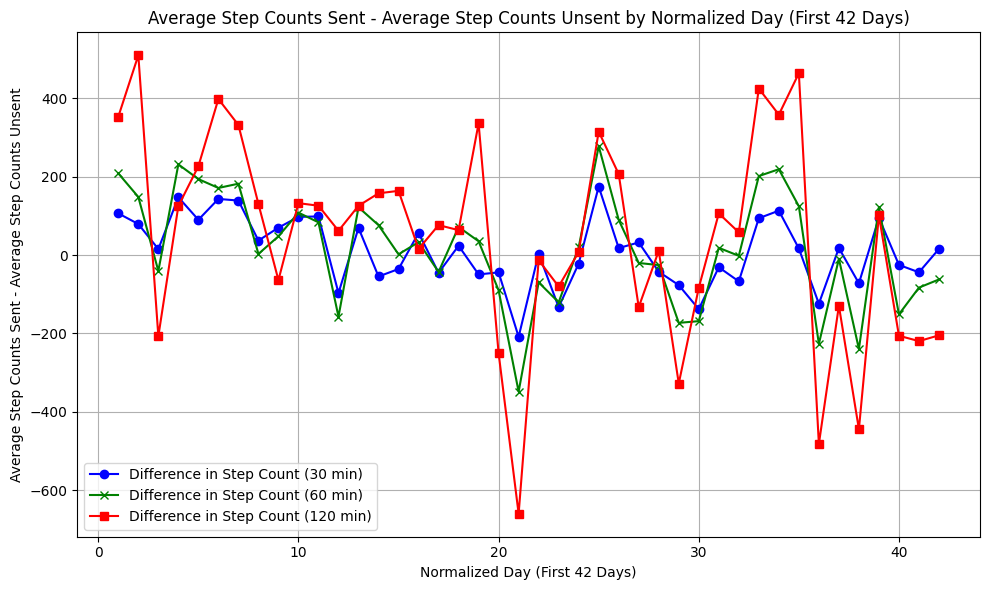

   normalized_day     diff_30
0               1  106.368421
1               2   79.215561
2               3   15.222146
3               4  147.568182
4               5   90.086370
   normalized_day     diff_60
0               1  208.552632
1               2  148.342529
2               3  -40.735388
3               4  231.511364
4               5  193.932524
   normalized_day    diff_120
0               1  353.267145
1               2  510.121662
2               3 -207.248402
3               4  125.204545
4               5  226.721997


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_send = '../data/modified_data/Cleaned Dataset.csv'  
file_path_no_send = '../data/modified_data/Cleaned Unsent Dataset.csv'  

send_data = pd.read_csv(file_path_send)
no_send_data = pd.read_csv(file_path_no_send)

# Clean the column names by stripping leading/trailing spaces
send_data.columns = send_data.columns.str.strip()
no_send_data.columns = no_send_data.columns.str.strip()

# Convert 'sugg.decision.utime' to datetime format
send_data['sugg.decision.utime'] = pd.to_datetime(send_data['sugg.decision.utime'])
no_send_data['sugg.decision.utime'] = pd.to_datetime(no_send_data['sugg.decision.utime'])

# Normalize the study days for each user by setting the first day as day 1
send_data['normalized_day'] = send_data.groupby('user.index')['sugg.decision.utime'].transform(lambda x: (x - x.min()).dt.days + 1)
no_send_data['normalized_day'] = no_send_data.groupby('user.index')['sugg.decision.utime'].transform(lambda x: (x - x.min()).dt.days + 1)

# Filter to only include the first 42 days
send_data = send_data[send_data['normalized_day'] <= 42]
no_send_data = no_send_data[no_send_data['normalized_day'] <= 42]

# Group by the normalized day and calculate the average step counts for jbsteps30, jbsteps60, and jbsteps120 for both send and no send data
# For 30 minutes
send_avg_steps_30 = send_data.groupby('normalized_day')['jbsteps30'].mean().reset_index()
no_send_avg_steps_30 = no_send_data.groupby('normalized_day')['jbsteps30'].mean().reset_index()

# For 60 minutes
send_avg_steps_60 = send_data.groupby('normalized_day')['jbsteps60'].mean().reset_index()
no_send_avg_steps_60 = no_send_data.groupby('normalized_day')['jbsteps60'].mean().reset_index()

# For 120 minutes
send_avg_steps_120 = send_data.groupby('normalized_day')['jbsteps120'].mean().reset_index()
no_send_avg_steps_120 = no_send_data.groupby('normalized_day')['jbsteps120'].mean().reset_index()

# Merge the data into a single DataFrame for comparison
comparison_df_30 = pd.merge(send_avg_steps_30, no_send_avg_steps_30, on='normalized_day', how='outer', suffixes=('_send', '_no_send'))
comparison_df_60 = pd.merge(send_avg_steps_60, no_send_avg_steps_60, on='normalized_day', how='outer', suffixes=('_send', '_no_send'))
comparison_df_120 = pd.merge(send_avg_steps_120, no_send_avg_steps_120, on='normalized_day', how='outer', suffixes=('_send', '_no_send'))

# Calculate the difference in averages for each normalized day
comparison_df_30['diff_30'] = comparison_df_30['jbsteps30_send'] - comparison_df_30['jbsteps30_no_send']
comparison_df_60['diff_60'] = comparison_df_60['jbsteps60_send'] - comparison_df_60['jbsteps60_no_send']
comparison_df_120['diff_120'] = comparison_df_120['jbsteps120_send'] - comparison_df_120['jbsteps120_no_send']

# Create a plot to compare the difference in average step counts over normalized days for 30, 60, and 120 minutes
plt.figure(figsize=(10, 6))

# Plot for 30 minutes
plt.plot(comparison_df_30['normalized_day'], comparison_df_30['diff_30'], label='Difference in Step Count (30 min)', marker='o', color='blue')

# Plot for 60 minutes
plt.plot(comparison_df_60['normalized_day'], comparison_df_60['diff_60'], label='Difference in Step Count (60 min)', marker='x', color='green')

# Plot for 120 minutes
plt.plot(comparison_df_120['normalized_day'], comparison_df_120['diff_120'], label='Difference in Step Count (120 min)', marker='s', color='red')

# Plot settings
plt.title('Average Step Counts Sent - Average Step Counts Unsent by Normalized Day (First 42 Days)')
plt.xlabel('Normalized Day (First 42 Days)')
plt.ylabel('Average Step Counts Sent - Average Step Counts Unsent')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the comparison table for normalized days (30, 60, 120)
print(comparison_df_30[['normalized_day', 'diff_30']].head())
print(comparison_df_60[['normalized_day', 'diff_60']].head())
print(comparison_df_120[['normalized_day', 'diff_120']].head())

In [68]:
# Sum the average step counts for 30 minutes
sum_sent_30 = comparison_df_30['jbsteps30_send'].mean()
sum_unsent_30 = comparison_df_30['jbsteps30_no_send'].mean()

# Sum the average step counts for 60 minutes
sum_sent_60 = comparison_df_60['jbsteps60_send'].mean()
sum_unsent_60 = comparison_df_60['jbsteps60_no_send'].mean()

# Sum the average step counts for 120 minutes
sum_sent_120 = comparison_df_120['jbsteps120_send'].mean()
sum_unsent_120 = comparison_df_120['jbsteps120_no_send'].mean()

# Display the results
sum_sent_30, sum_unsent_30, sum_sent_60, sum_unsent_60, sum_sent_120, sum_unsent_120

(np.float64(243.57701524383836),
 np.float64(233.03506262753447),
 np.float64(513.5187084046358),
 np.float64(495.4616884308661),
 np.float64(1049.0887262515764),
 np.float64(1004.2902072908856))